# Introduction to Scientific Computing Lecture 5.2

## Introduction to masked arrays

Masking arrays is very useful in analysing subsets of data. Numpy has a masked array subpackage and tons of associated functions

Examples from: http://scipy-lectures.org/intro/numpy/elaborate_arrays.html#maskedarray-dealing-with-propagation-of-missing-data
and
http://scipy-lectures.org/advanced/advanced_numpy/index.html#masked-array-missing-data

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# this changes the default plotting for matplotlib
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [5.0, 3.0]
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

In [53]:
# suppose you have some data and one of the values is bad
x = np.array([1, 2, 3, -99, 5])

In [54]:
# if we take the average we get something very wrong
x.mean()

-17.600000000000001

In [55]:
# you can mask the missing data
mx = np.ma.masked_array(x, mask=[0, 0, 0, 1, 0])
mx

masked_array(data = [1 2 3 -- 5],
             mask = [False False False  True False],
       fill_value = 999999)

In [56]:
# then the mean works
mx.mean()

2.75

There are a lot of useful functions to work with masks

In [57]:
# mask the data where a certain logical statement is true
mx2 = np.ma.masked_where(x < 0, x)
mx2

masked_array(data = [1 2 3 -- 5],
             mask = [False False False  True False],
       fill_value = 999999)

In [58]:
# note this syntax is the same result as above
np.mean(mx2)

2.75

## Example from tutorial: Masked statistics

This is using the same data that was introduced previously

### Getting and playing with the data

here is the data:

http://scipy-lectures.org/_downloads/populations.txt

Note you have to change the path below if you put it in a different folder than where your jupyter notebook is

In [59]:
data = np.loadtxt('Data/populations.txt')

In [60]:
# note the data is year, pop1, pop2, pop3
data

array([[  1900.,  30000.,   4000.,  48300.],
       [  1901.,  47200.,   6100.,  48200.],
       [  1902.,  70200.,   9800.,  41500.],
       [  1903.,  77400.,  35200.,  38200.],
       [  1904.,  36300.,  59400.,  40600.],
       [  1905.,  20600.,  41700.,  39800.],
       [  1906.,  18100.,  19000.,  38600.],
       [  1907.,  21400.,  13000.,  42300.],
       [  1908.,  22000.,   8300.,  44500.],
       [  1909.,  25400.,   9100.,  42100.],
       [  1910.,  27100.,   7400.,  46000.],
       [  1911.,  40300.,   8000.,  46800.],
       [  1912.,  57000.,  12300.,  43800.],
       [  1913.,  76600.,  19500.,  40900.],
       [  1914.,  52300.,  45700.,  39400.],
       [  1915.,  19500.,  51100.,  39000.],
       [  1916.,  11200.,  29700.,  36700.],
       [  1917.,   7600.,  15800.,  41800.],
       [  1918.,  14600.,   9700.,  43300.],
       [  1919.,  16200.,  10100.,  41300.],
       [  1920.,  24700.,   8600.,  47300.]])

In [61]:
data.shape
# this is time x variables

(21, 4)

In [62]:
# extract all times (all elements in first dim) and all years (first index in second dim)
data[:,0]

array([ 1900.,  1901.,  1902.,  1903.,  1904.,  1905.,  1906.,  1907.,
        1908.,  1909.,  1910.,  1911.,  1912.,  1913.,  1914.,  1915.,
        1916.,  1917.,  1918.,  1919.,  1920.])

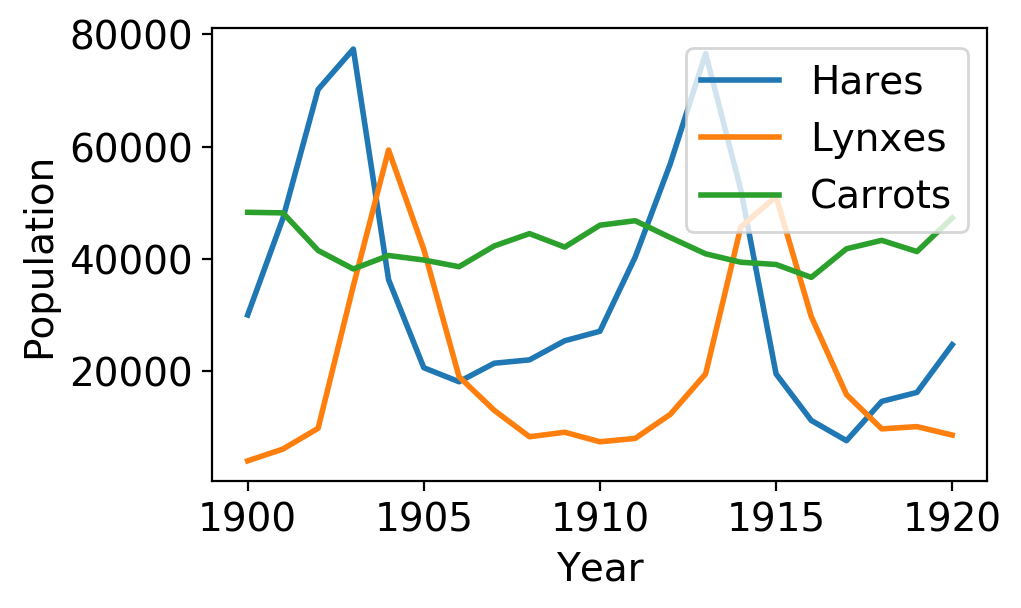

In [63]:
# time vs population plots
#plt.figure(figsize=(8, 6))
plt.plot(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,2])
plt.plot(data[:,0], data[:,3])
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['Hares', 'Lynxes', 'Carrots'], loc = 'upper right')

In [64]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Places a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line.set_label('Label via method')
        line, = ax.plot([1, 2, 3])
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label s

We may want to rename the data to make it easier to deal with


In [65]:
data.T
# the .T transposes the data
# now we have years as a row instead of a column

array([[  1900.,   1901.,   1902.,   1903.,   1904.,   1905.,   1906.,
          1907.,   1908.,   1909.,   1910.,   1911.,   1912.,   1913.,
          1914.,   1915.,   1916.,   1917.,   1918.,   1919.,   1920.],
       [ 30000.,  47200.,  70200.,  77400.,  36300.,  20600.,  18100.,
         21400.,  22000.,  25400.,  27100.,  40300.,  57000.,  76600.,
         52300.,  19500.,  11200.,   7600.,  14600.,  16200.,  24700.],
       [  4000.,   6100.,   9800.,  35200.,  59400.,  41700.,  19000.,
         13000.,   8300.,   9100.,   7400.,   8000.,  12300.,  19500.,
         45700.,  51100.,  29700.,  15800.,   9700.,  10100.,   8600.],
       [ 48300.,  48200.,  41500.,  38200.,  40600.,  39800.,  38600.,
         42300.,  44500.,  42100.,  46000.,  46800.,  43800.,  40900.,
         39400.,  39000.,  36700.,  41800.,  43300.,  41300.,  47300.]])

In [66]:
# make vectors of the variables
year, hares, lynxes, carrots = data.T  # trick: columns to variables

In [67]:
year

array([ 1900.,  1901.,  1902.,  1903.,  1904.,  1905.,  1906.,  1907.,
        1908.,  1909.,  1910.,  1911.,  1912.,  1913.,  1914.,  1915.,
        1916.,  1917.,  1918.,  1919.,  1920.])

In [68]:
hares

array([ 30000.,  47200.,  70200.,  77400.,  36300.,  20600.,  18100.,
        21400.,  22000.,  25400.,  27100.,  40300.,  57000.,  76600.,
        52300.,  19500.,  11200.,   7600.,  14600.,  16200.,  24700.])

In [69]:
lynxes

array([  4000.,   6100.,   9800.,  35200.,  59400.,  41700.,  19000.,
        13000.,   8300.,   9100.,   7400.,   8000.,  12300.,  19500.,
        45700.,  51100.,  29700.,  15800.,   9700.,  10100.,   8600.])

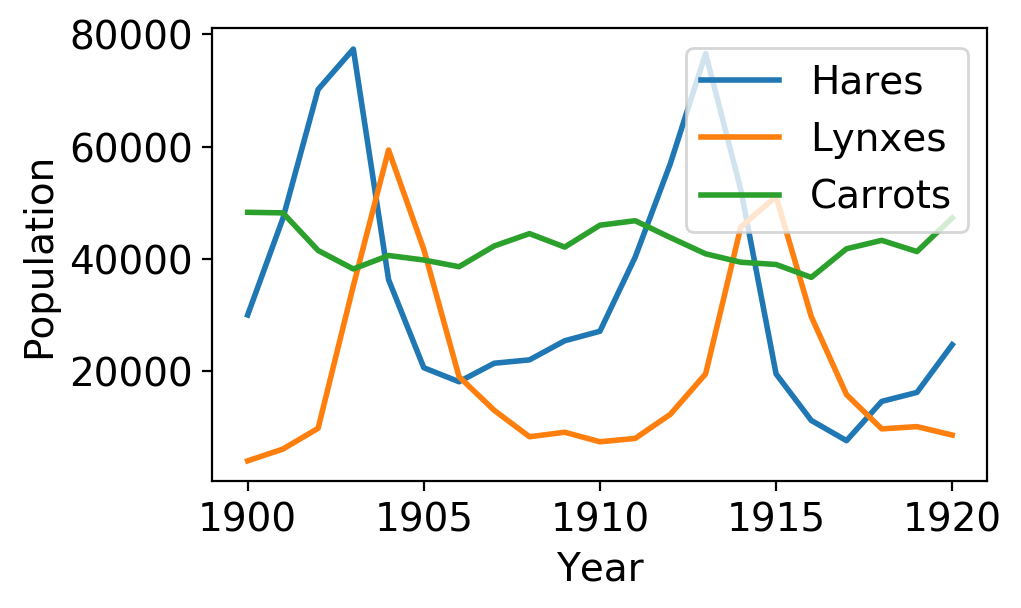

In [70]:
# note this is the same as above
plt.plot(year, hares)
plt.plot(year, lynxes)
plt.plot(year, carrots)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['Hares', 'Lynxes', 'Carrots'], loc = 'upper right')

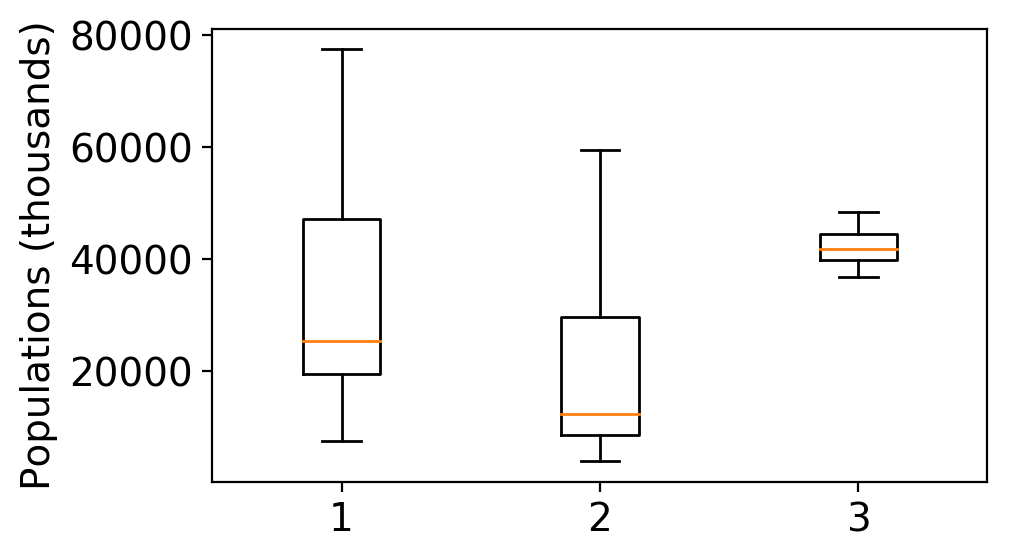

In [71]:
# how about a boxplot?
# see:
# https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

plt.boxplot([hares, lynxes, carrots])
#plt.xlabel('hares, lynxes, carrots')
plt.ylabel('Populations (thousands)')
labels = ('hares', 'lynxes', 'carrots')

# orange line is median

### New problem with this data (1.3.5.3)

Canadian rangers were distracted when counting hares and lynxes in 1903-1910 and 1917-1918, and got the numbers are wrong. (Carrot farmers stayed alert, though.) Compute the mean populations over time, ignoring the invalid numbers.

So the problem is that the hare and lynx data are bad in these years. So we need to mask these dates before we take the averages. 

Let's take the averages of the data first, before we mask. We either need to use the separate data vectors, or we need to be clever about taking the average of the matrix along the correct axis

In [72]:
data.mean()
# this just gives us the mean of the whole array, which is not helpful
# remember that the data is time x variables, so we want to average over the time index

24639.404761904763

In [73]:
np.mean(data, axis = 0)

array([  1910.        ,  34080.95238095,  20166.66666667,  42400.        ])

In [74]:
data.mean(axis = 0)

array([  1910.        ,  34080.95238095,  20166.66666667,  42400.        ])

In [75]:
# similarly
print(hares.mean())
print(lynxes.mean())
print(carrots.mean())

34080.952381
20166.6666667
42400.0


Now let's mask out the bad years and recalculate the averages

We want to mask 1903-1910 and 1917-1918

In [76]:
year

array([ 1900.,  1901.,  1902.,  1903.,  1904.,  1905.,  1906.,  1907.,
        1908.,  1909.,  1910.,  1911.,  1912.,  1913.,  1914.,  1915.,
        1916.,  1917.,  1918.,  1919.,  1920.])

In [77]:
(year > 1903)
# is this right?

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [78]:
(year >= 1903)
# is this right? Is 1903 true?

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [79]:
(year >= 1903) & (year <= 1910)

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

In [80]:
# note this doesn't work:
(year >= 1903) and (year <= 1910)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [81]:
# we need to add on the other range as well: 1917-1918
# is this an and or an or question?
# note "or" is |
((year >= 1903) & (year <= 1910)) |((year >= 1917) & (year <= 1918)) 

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False], dtype=bool)

In [82]:
mask = ((year >= 1903) & (year <= 1910)) |((year >= 1917) & (year <= 1918)) 

In [83]:
# now we are ready to mask
lynxes_masked = np.ma.masked_where(mask,lynxes)

In [84]:
lynxes_masked

masked_array(data = [4000.0 6100.0 9800.0 -- -- -- -- -- -- -- -- 8000.0 12300.0 19500.0
 45700.0 51100.0 29700.0 -- -- 10100.0 8600.0],
             mask = [False False False  True  True  True  True  True  True  True  True False
 False False False False False  True  True False False],
       fill_value = 1e+20)

In [85]:
hares_masked = np.ma.masked_where(mask,hares)
# note carrots are fine

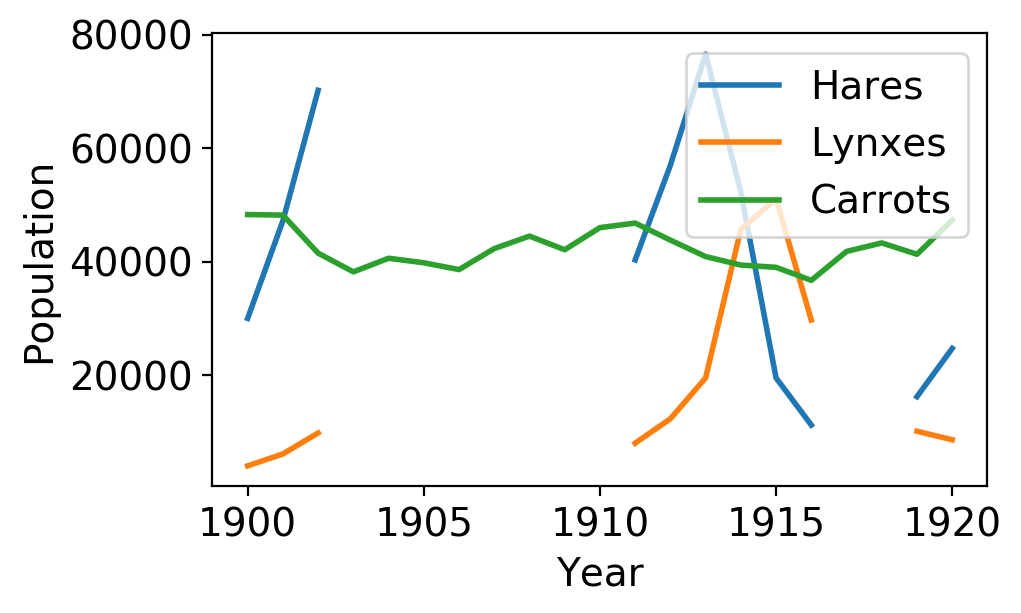

In [86]:
# note this is the same as above
plt.plot(year, hares_masked)
plt.plot(year, lynxes_masked)
plt.plot(year, carrots)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['Hares', 'Lynxes', 'Carrots'], loc = 'upper right')

In [87]:
print(hares.mean())
print(hares_masked.mean())

34080.952381
40472.7272727


In [88]:
print(lynxes.mean())
print(lynxes_masked.mean())

20166.6666667
18627.2727273


''

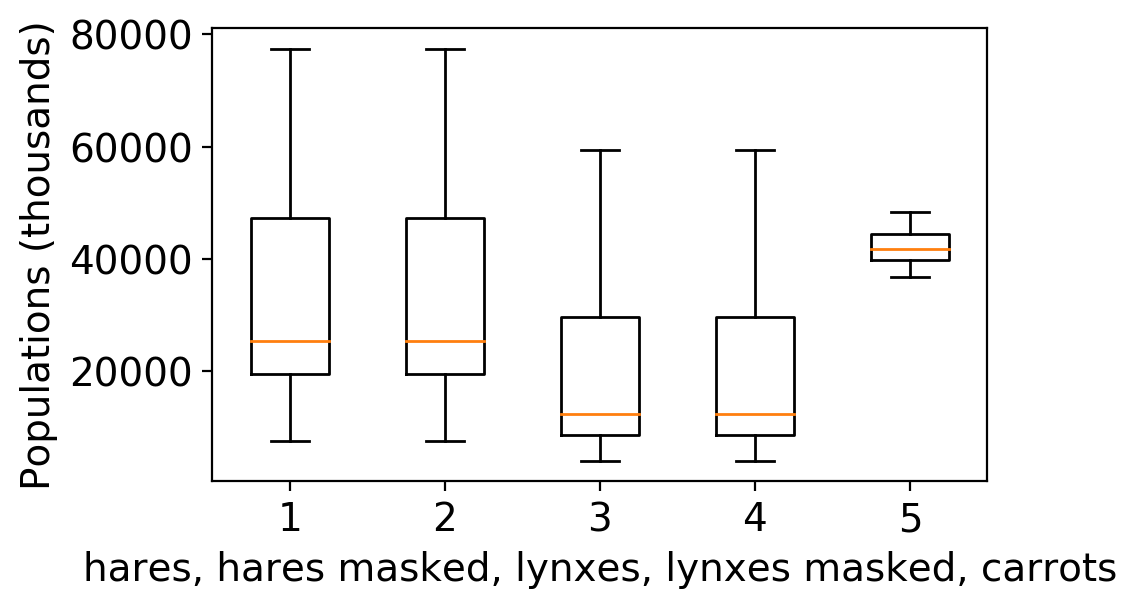

In [89]:
plt.boxplot([hares,hares_masked, lynxes, lynxes_masked, carrots])
plt.xlabel('hares, hares masked, lynxes, lynxes masked, carrots')
plt.ylabel('Populations (thousands)')
;
# didn't change the statistics signifigantly

# Challenge problems:

1) There was an issue with the counting methods. The hare populations were poorly estimated when the populations were over 60,000. Mask out the years this was true and recalcuate the averages.

2) Using the original data, what is the pairwise (pearson) correlation between the three populations? How do you calculate this in python? What if you put in a lag in the population, e.g. the hare population with the lynx population a year later? What lag gives you the best correlations between the populations?

## 1. Mask out data where hares are over 60,000

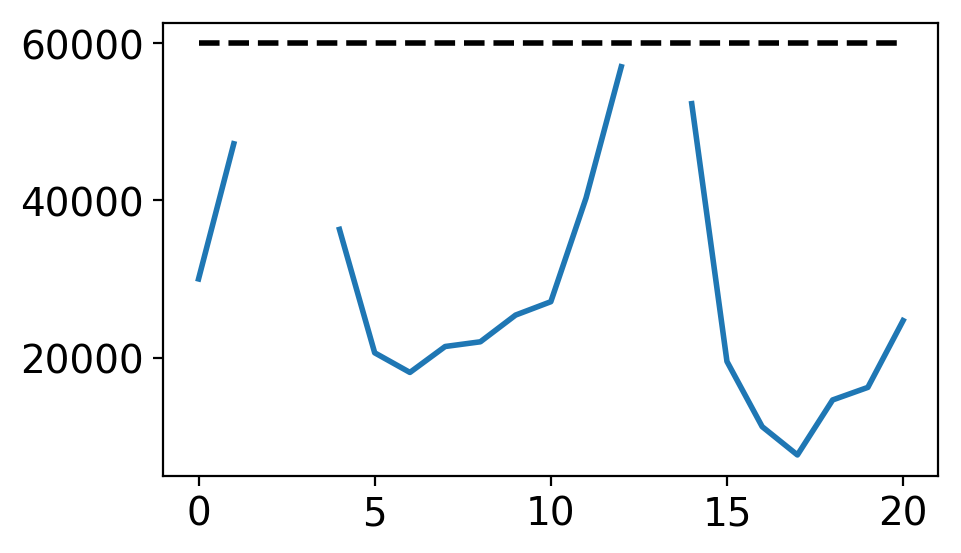

In [94]:
hares_new = np.ma.masked_where(hares>60000, hares )
plt.plot(hares_new)
plt.plot([0,20],[60000,60000],'--k')

In [92]:
hares_new.mean()
# this goes down signifigantly, as expected

27305.555555555555

## 2. Correlation between the three poplulations

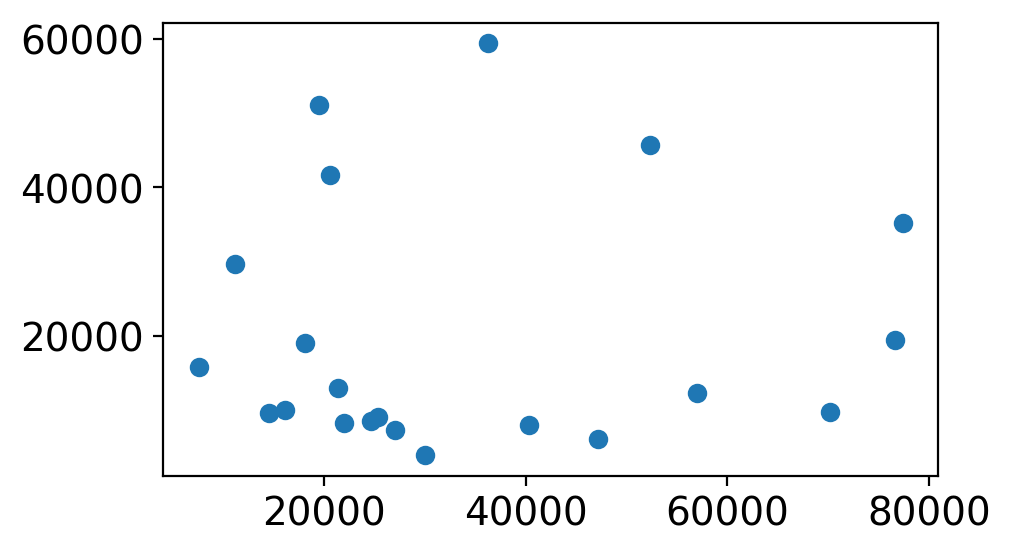

In [98]:
plt.scatter(hares,lynxes)
# looks very scattered, as in not linearly correlated

In [100]:
np.corrcoef(hares,lynxes)
# r = 0.07, very low

array([[ 1.        ,  0.07189206],
       [ 0.07189206,  1.        ]])

Text(0,0.5,'Lynxes')

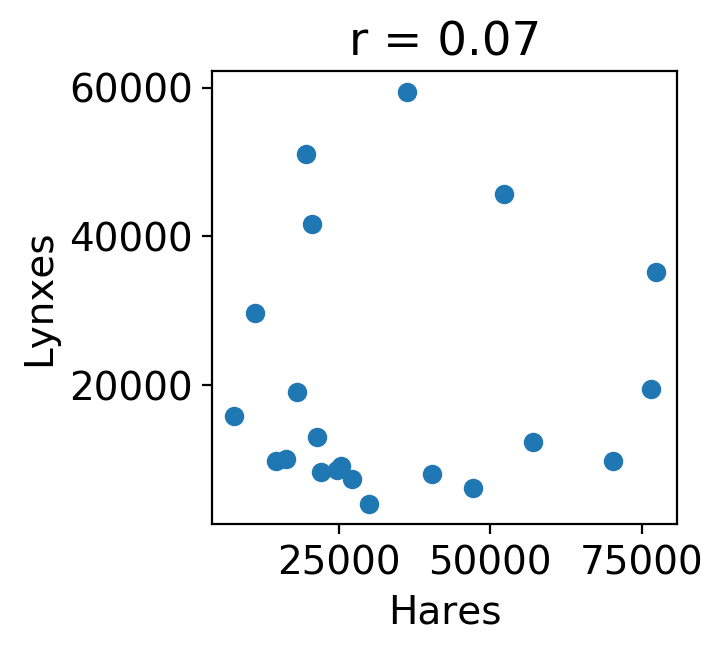

In [110]:
plt.figure(figsize=(3,3))
plt.scatter(hares,lynxes)
plt.title('r = 0.07')
plt.xlabel('Hares')
plt.ylabel('Lynxes')
# looks very scattered, as in not linearly correlated

In [112]:
cor = np.corrcoef(hares,carrots)
cor[0,1]

-0.016603777709879395

Text(0,0.5,'Carrots')

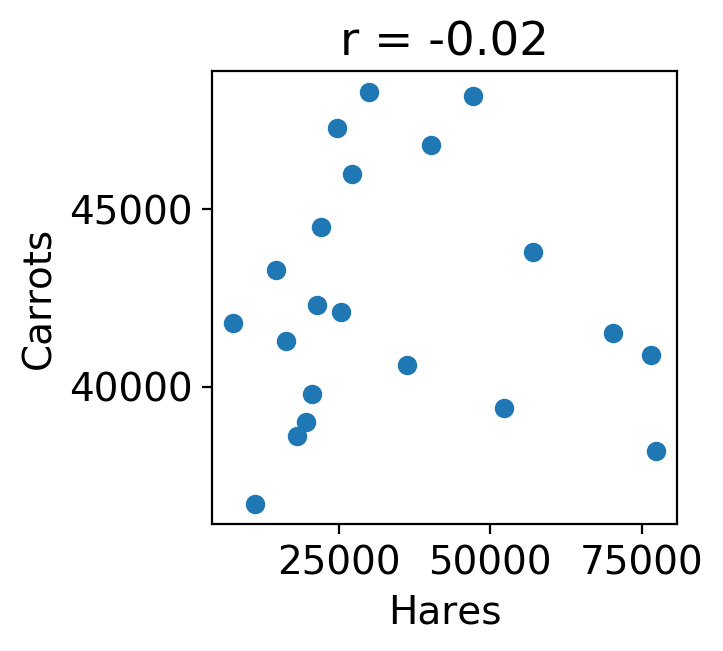

In [113]:
plt.figure(figsize=(3,3))
plt.scatter(hares,carrots)
plt.title('r = -0.02')
plt.xlabel('Hares')
plt.ylabel('Carrots')

In [116]:
cor = np.corrcoef(lynxes,carrots)
cor[0,1]

-0.6805771698401617

Text(0,0.5,'Carrots')

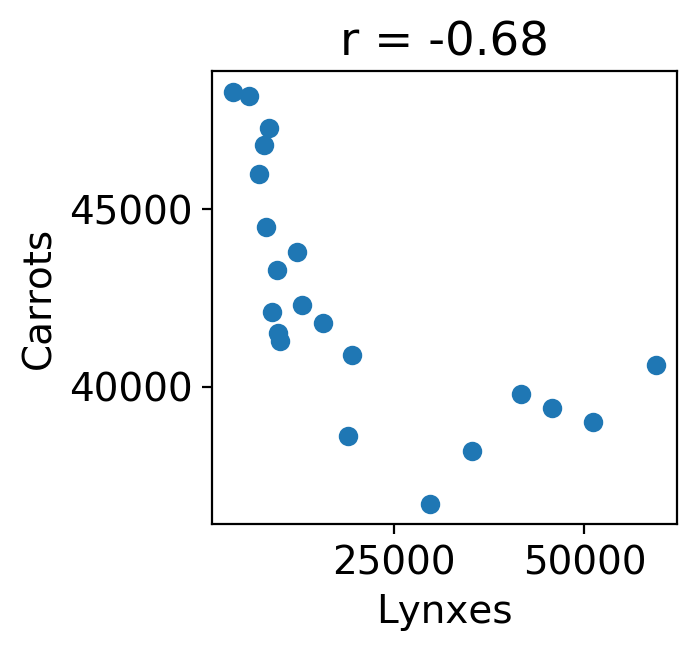

In [117]:
plt.figure(figsize=(3,3))
plt.scatter(lynxes,carrots)
plt.title('r = -0.68')
plt.xlabel('Lynxes')
plt.ylabel('Carrots')